# Import data

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator

df = pd.read_excel (r'../data/all_submission_files.xlsx')
print(df)

      report_end_date      cik              nameOfIssuer      titleOfClass  \
0          2020-09-30  1129770  SPDR S&P 500                           COM   
1          2020-09-30  1129770  SPDR Dow Jones Ind                     COM   
2          2020-09-30  1129770  Ishares Russell                        COM   
3          2020-09-30  1129770  Invesco QQQ TRUST                      COM   
4          2020-09-30  1129770  iShares Russell 20                     COM   
...               ...      ...                       ...               ...   
46767      2020-12-31  1744091                ISHARES TR  RUS 2000 GRW ETF   
46768      2020-12-31  1744091         ETF SER SOLUTIONS       US GLB JETS   
46769      2020-12-31  1744091           BEYOND MEAT INC               COM   
46770      2020-12-31  1744091             SUNPOWER CORP               COM   
46771      2020-12-31  1744091      LOCKHEED MARTIN CORP               COM   

           cusip        value  sshPrnamt sshPrnamtType  
0     

Examine the different data types

In [2]:
df.dtypes

report_end_date    datetime64[ns]
cik                         int64
nameOfIssuer               object
titleOfClass               object
cusip                      object
value                       int64
sshPrnamt                   int64
sshPrnamtType              object
dtype: object

# Pre-process Data

## drop missing values (remove rows having missing values)

In [3]:
df.isna().sum()

report_end_date    0
cik                0
nameOfIssuer       1
titleOfClass       1
cusip              0
value              0
sshPrnamt          0
sshPrnamtType      0
dtype: int64

In [4]:
print('Dimension of the dataframe:',df.shape)
df.dropna(how='any',inplace=True)
print('New Dimension of the dataframe:',df.shape)
df.head(10)

Dimension of the dataframe: (46772, 8)
New Dimension of the dataframe: (46771, 8)


,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType
0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,70889608000,211680,SH
1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,29886300000,107698,SH
2,2020-09-30,1129770,Ishares Russell,COM,464287622,26825894000,143339,SH
3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,21672909000,78005,SH
4,2020-09-30,1129770,iShares Russell 20,COM,464287655,9434973000,62988,SH
5,2020-09-30,1129770,SPDR S&P Mid-Cap 4,COM,78464a821,9351708000,27600,SH
6,2020-09-30,1129770,Amazon Com Inc,COM,023135106,1032783000,328,SH
7,2020-09-30,1129770,SPDR S&P Homebuild,COM,78464a888,879628000,16326,SH
8,2020-09-30,1129770,Central Fd Cda Ltd,COM,153501101,783173000,42703,SH
9,2020-09-30,1129770,Accelerate Diagnos,COM,00430h105,690395000,64765,SH


One row is deleted due to missing values in the columns nameofIssuer and titleOfClass. <br/>Print the first 10 rows 

## Data Formatting, Creating New Column

Delete extra columns, make the data homogenous and create a new column "value_per_share" for analysis. 

In [5]:
from sklearn.base import BaseEstimator

class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, df):
        df['cusip'] = df['cusip'].str.upper()
        df['value_per_share'] = df['value'] / df['sshPrnamt']
        df['value_log'] = df['value'].apply(lambda x: np.log(x) if x != 0 else 0)
        df['sshPrnamt_log'] = df['sshPrnamt'].apply(lambda x: np.log(x) if x != 0 else 0)
        df['valuePerShare_log'] = df['value_per_share'].apply(lambda x: np.log(x) if x != 0 else 0)
        
        return df

In [6]:
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['titleOfClass','sshPrnamtType',])])

Create a pipeline

In [7]:
df_processed = Pipeline(steps=[('CreateAndUnique',OutletTypeEncoder()),
                                ('pre_processing',pre_process)])

In [8]:
df_processed

Pipeline(steps=[('CreateAndUnique', OutletTypeEncoder()),
                ('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['titleOfClass',
                                                   'sshPrnamtType'])]))])

In [9]:
#df['value_per_share'] = np.where(df['sshPrnamtType']=='SH',((df['value']*1000)/df['sshPrnamt']),
#                                  np.where(df['sshPrnamtType']=='PRN',df['sshPrnamt'], 0))


#   ***Where to put above lines?
df['value_per_share'] = df['value'] / df['sshPrnamt']

descriptive statistics of the numerical variables

In [10]:
df.describe()

,cik,value,sshPrnamt,value_per_share
count,4.677100e+04,4.677100e+04,4.677100e+04,4.676800e+04
mean,1.333147e+06,7.083168e+07,4.115935e+05,2.721542e+03
std,3.269081e+05,1.076631e+09,3.697519e+06,3.359409e+04
min,3.149650e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.325400e+05,8.350000e+04,2.000000e+03,1.613085e+01
50%,1.429788e+06,5.560000e+05,1.129400e+04,4.868180e+01
75%,1.549408e+06,3.392000e+06,6.156200e+04,1.162853e+02
max,1.846995e+06,7.088961e+10,2.800908e+08,3.256931e+06


It seems that the same concept is never represented in different ways so we don't need to manipulate them. Here, "cik" column is also presented but this has no meaning, so can ignore this column

 # Normalisation (also included in the pipeline)
 The data frame used here is not formatted due to the operation includes in pipeline

Trying to plot histograms for data in columns 'sshPrnamt' and 'values'. Both cannot be ploted, so listed value_counts() in the following to see the distribution of the data in those two columns. The distribution of the data seems skewed. 

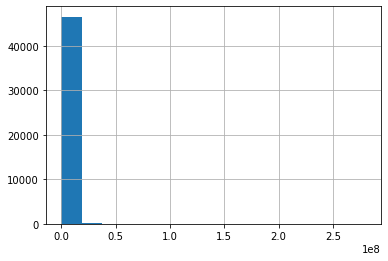

In [11]:
df['sshPrnamt'].hist(bins=15)

In [12]:
df['sshPrnamt'].value_counts()

100       611
200       346
500       294
300       264
1000      263
         ... 
21328       1
504900      1
62540       1
221266      1
37472       1
Name: sshPrnamt, Length: 26382, dtype: int64

In [13]:
df['value'].value_counts()

0              1395
1000            888
2000            744
3000            568
4000            469
               ... 
5774000           1
260615000         1
60268000          1
12243983000       1
38142000          1
Name: value, Length: 13124, dtype: int64

Because of the skewed characteristics of the data in columns, we copy the columns "sshPrnamt","value" and "value_per_share" and normalise them by log scaling.

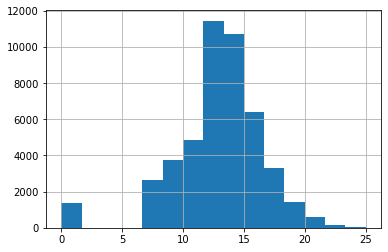

In [14]:
df['value_log'] = df['value'].apply(lambda x: np.log(x) if x != 0 else 0)
df['value_log'].hist(bins=15)

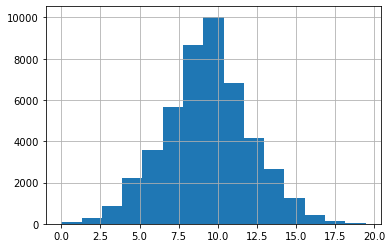

In [15]:
df['sshPrnamt_log'] = df['sshPrnamt'].apply(lambda x: np.log(x) if x != 0 else 0)
df['sshPrnamt_log'].hist(bins=15) 

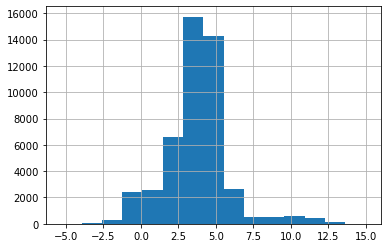

In [16]:
df['valuePerShare_log'] = df['value_per_share'].apply(lambda x: np.log(x) if x != 0 else 0)
df['valuePerShare_log'].hist(bins=15)

Separate 'report_end_date' into Year, Month and day.

In [17]:
df['Year'] = pd.DatetimeIndex(df['report_end_date']).year
df['Month'] = pd.DatetimeIndex(df['report_end_date']).month
df['day'] = pd.DatetimeIndex(df['report_end_date']).day

Make dataframes according to year for annual analysis

In [18]:
df_dict = {f'df{i}': d for i, (g, d) in enumerate(df.groupby('Year'))}
print(df_dict.keys())

dict_keys(['df0', 'df1', 'df2', 'df3', 'df4', 'df5', 'df6'])


Histograms for "ciks" in 2015

[1315828 1626379 1172799 1280043 1476380]


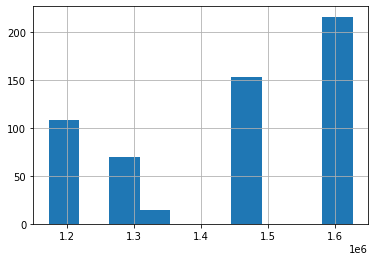

In [19]:
print(df_dict['df0']['cik'].unique())
df_dict['df0']['cik'].hist(bins=10)

Histograms for "ciks" in 2016

[1129770 1444055 1429788  938506 1387723 1110443  913414 1641643 1364615
 1534468 1497637 1681372  894300 1510989 1427261 1488207]


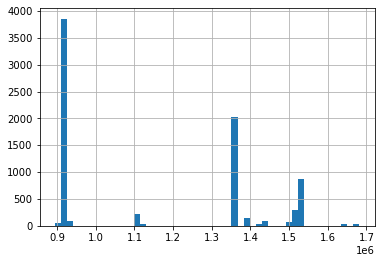

In [20]:
print(df_dict['df1']['cik'].unique())
df_dict['df1']['cik'].hist(bins=50)

Histograms for "ciks" in 2017

[ 805867 1708872  938506 1476380 1540569 1476179  936936 1260468]


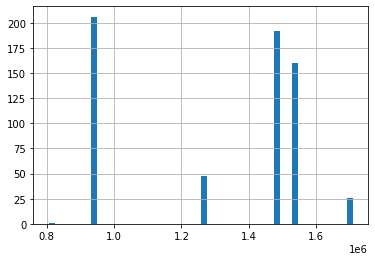

In [21]:
print(df_dict['df2']['cik'].unique())
df_dict['df2']['cik'].hist(bins=50)

Histograms for "ciks" in 2018

[1583119  314965  938775 1278641 1282550 1388838 1585550 1730476 1622852
 1434165 1261239]


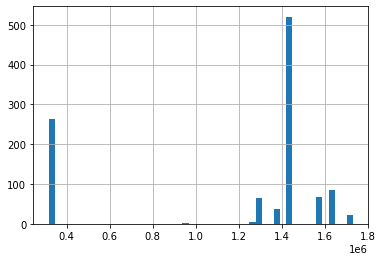

In [22]:
print(df_dict['df3']['cik'].unique())
df_dict['df3']['cik'].hist(bins=50)

Histograms for "ciks" in 2019

[1773030  314965 1594197 1730475 1580830 1744317  883790  891943 1755386
 1081198 1549408 1508120 1630709 1260468 1666613]


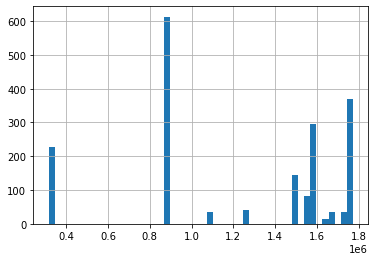

In [23]:
print(df_dict['df4']['cik'].unique())
df_dict['df4']['cik'].hist(bins=50)

Histograms for "ciks" in 2020

[1129770 1733510 1665018 1846995 1842509 1315828 1626379  750641 1495703
 1386364 1717658 1344551 1570251 1793367 1594417 1727605 1830008 1708872
 1387723 1712533 1740316 1831193 1591986  883790 1812178  903944 1747799
 1818044 1549042  932540 1456114 1760263 1566601 1766907 1713936 1589282
 1055544 1549408 1641643 1032814 1323119 1759760 1534468 1009254 1600085
 1844831 1358828 1497637 1792397 1665642 1475896 1083340 1725362 1695345
 1681372 1602237 1845003 1549575 1161722 1387366 1753570 1713697 1622852
 1790525 1510989 1542166 1420473 1728201 1844393  819535 1427261 1697856
 1171592 1034642 1802516 1602020 1749890 1664656 1716539 1425165  911270
 1729254 1078246 1757043 1559077 1631941 1276673  732847 1628896 1086763
  921531 1751581 1534270 1744091]


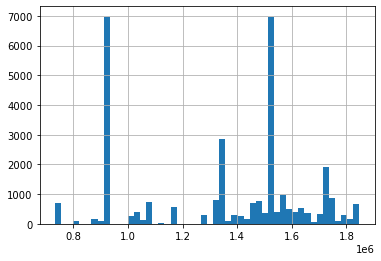

In [24]:
print(df_dict['df5']['cik'].unique())
df_dict['df5']['cik'].hist(bins=50)

Histograms for "ciks" in 2021

[1369702 1777127 1765278 1426960 1056821 1745885 1839735 1566601 1727917
 1510809 1577216 1317802 1790525 1749744 1666613]


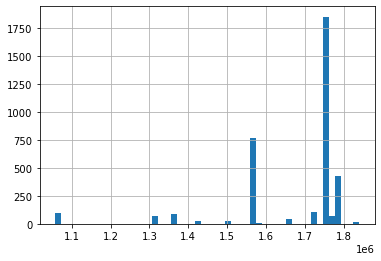

In [25]:
print(df_dict['df6']['cik'].unique())
df_dict['df6']['cik'].hist(bins=50)

In [26]:
df

,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType,value_per_share,value_log,sshPrnamt_log,valuePerShare_log,Year,Month,day
0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,70889608000,211680,SH,334890.438398,24.984390,12.262831,12.721559,2020,9,30
1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,29886300000,107698,SH,277500.974948,24.120666,11.587086,12.533580,2020,9,30
2,2020-09-30,1129770,Ishares Russell,COM,464287622,26825894000,143339,SH,187150.001046,24.012633,11.872968,12.139666,2020,9,30
3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,21672909000,78005,SH,277839.997436,23.799329,11.264528,12.534801,2020,9,30
4,2020-09-30,1129770,iShares Russell 20,COM,464287655,9434973000,62988,SH,149790.007620,22.967689,11.050700,11.916990,2020,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46767,2020-12-31,1744091,ISHARES TR,RUS 2000 GRW ETF,464287648,224000,782,SH,286.445013,12.319401,6.661855,5.657547,2020,12,31
46768,2020-12-31,1744091,ETF SER SOLUTIONS,US GLB JETS,26922A842,219000,9794,SH,22.360629,12.296827,9.189525,3.107302,2020,12,31
46769,2020-12-31,1744091,BEYOND MEAT INC,COM,08862E109,218000,1740,SH,125.287356,12.292250,7.461640,4.830610,2020,12,31
46770,2020-12-31,1744091,SUNPOWER CORP,COM,867652406,213000,8310,SH,25.631769,12.269047,9.025215,3.243833,2020,12,31
